## Understanding Probability Distributions

#### Importance in Approximating Real-World Phenomena

In the realm of statistics and data science, probability distributions are invaluable tools for approximating and understanding real-world phenomena. From modeling the heights of individuals in a population to predicting the occurrence of rare events, distributions allow us to make informed decisions, assess risks, and draw meaningful insights from observed data.

#### Bridging the Gap Between Theory and Real-World Phenomena

Probability distributions serve as mathematical models that help us understand and describe the behavior of random variables. They play a pivotal role in **approximating** real-world phenomena. They provide a structured way to describe, model, and manipulate uncertain situations. The elegance of these distributions lies in their mathematical tractability, enabling us to compute probabilities, summarize characteristics, and make predictions with ease.


By mathematical tractability, remember what we saw in class, that every distribution has a *mean* and *variance*, and that we can use these to make predictions about the data. 

### Manipulating Distributions.

In this notbebook, we will resort to a python library called [scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) to manipulate distributions. Scipy is a powerful library that contains a large number of tools for scientific computing. We will use the `scipy.stats` module to manipulate distributions. 

This module contains a large number of *probability distributions classes*: these python objects allow us to generate random samples from a distribution, compute the probability density function (PDF) or probability mass function (PMF) of a distribution, compute the cumulative distribution function (CDF) of a distribution, and compute the quantiles of a distribution.

in each case, these methods are accessed as follows:

```python
from scipy.stats import continuous_distribution_name, discrete_distribution_name
continuous_distribution_name.pdf(x, *args, **kwargs) # Probability density function
continuous_distribution_name.cdf(x, *args, **kwargs) # Cumulative distribution function
continuous_distribution_name.ppf(x, *args, **kwargs) # Percent point function (inverse of cdf — percentiles).
continuous_distribution_name.rvs(*args, **kwargs) # Random variates.
```

```python
from scipy.stats import continuous_distribution_name, discrete_distribution_name
discrete_distribution_name.pmf(x, *args, **kwargs) # Probability mass function
discrete_distribution_name.cdf(x, *args, **kwargs) # Cumulative distribution function
discrete_distribution_name.ppf(x, *args, **kwargs) # Percent point function (inverse of cdf — percentiles).
discrete_distribution_name.rvs(*args, **kwargs) # Random variates.

```


Specifically, we will use the `scipy.stats` module to:

1. Generate random samples from a distribution.
2. Compute the probability density function (PDF) of a distribution.
3. Compute the cumulative distribution function (CDF) of a distribution.
4. Compute the quantiles of a distribution.


## Examples

### 1. The binomial distribution

Let's say we have a coin that we flip 10 times. What is the probability that we get 5 heads? 6 heads? 7 heads? 8 heads? 9 heads? 10 heads?

The binomial distribution is a discrete probability distribution that models the probability of obtaining one of two outcomes (e.g. success or failure) in a given number of independent trials.

The binomial distribution is characterized by two parameters: $n$ and $p$. $n$ is the number of trials, and $p$ is the probability of success in each trial. The binomial distribution is defined as follows:

$$P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$$

where $k$ is the number of successes, $n$ is the number of trials, and $p$ is the probability of success in each trial.

#### Mean and Variance

- The mean of a binomial distribution is $np$.
- The variance of a binomial distribution is $np(1-p)$.

#### Example

Let's look at a plot of the binomial distribution for $n = 10$ and $p = 0.3$ (to deviate from the 50/50 chance of a coin flip).


We will resort to the class `binom` of `scipy.stats` package. This package is capable of determining the Probability Mass Function of a binomial distribution for a set of parameters. 

Notice the use of the `pmf` method of the `binom` class. Binomial outcomes are discrete, so we use the `pmf` method instead of the `pdf` method.




In [6]:
# plot binomial distribution for n = 10 and p = 0.3

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success

# calculate binomial distribution
number_occurences = np.arange(0, 11, 1) # number of successes - this is an array from 0 to 10
probability_each_success = binom.pmf(number_occurences, n, p) # probability of successes - calculated for each number of successes

# plot mean and standard deviation
mean = n * p
std = np.sqrt(n * p * (1 - p))
plt.axvline(mean, color='r', linestyle='--', label='mean')
plt.axvline(mean + std, color='g', linestyle='--', label='std')
plt.axvline(mean - std, color='g', linestyle='--')

# draw arrow of standard deviation
plt.annotate('', xy=(mean + std, 0.2), xytext=(mean, 0.2), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('', xy=(mean - std, 0.2), xytext=(mean, 0.2), arrowprops=dict(facecolor='green', shrink=0.05))

# add annotation to mean and standard deviation
plt.annotate('mean', xy=(mean, 0.2), xytext=(mean + 0.2, 0.25))
plt.annotate('std', xy=(mean + std, 0.2), xytext=(mean + std + 0.2, 0.25))
plt.annotate('std', xy=(mean - std, 0.2), xytext=(mean - std + 0.2, 0.25))

# plot binomial distribution
plt.plot(number_occurences, probability_each_success, 'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)
plt.show()


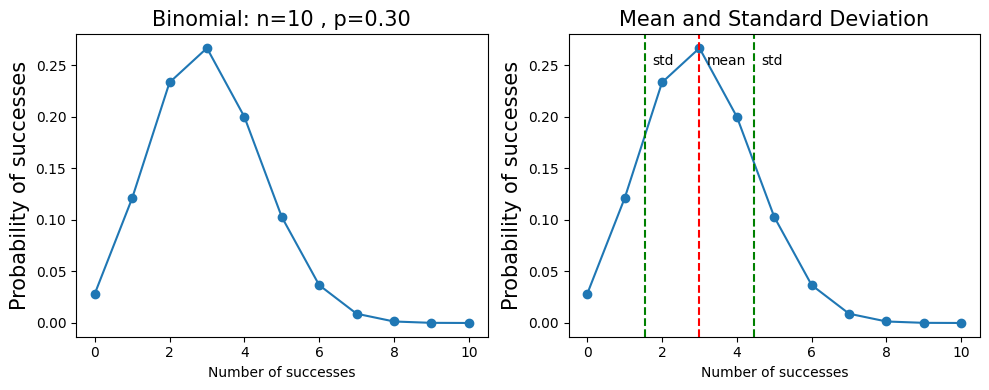

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success

# calculate binomial distribution
number_occurences = np.arange(0, 11, 1) # number of successes - this is an array from 0 to 10
probability_each_success = binom.pmf(number_occurences, n, p) # probability of successes - calculated for each number of successes

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the binomial distribution on the left subplot
axs[0].plot(number_occurences, probability_each_success, 'o-')
axs[0].set_title('Binomial: n=%i , p=%.2f' % (n, p), fontsize=15)
axs[0].set_xlabel('Number of successes')
axs[0].set_ylabel('Probability of successes', fontsize=15)

# Plot the mean and standard deviation on the right subplot
mean = n * p
std = np.sqrt(n * p * (1 - p))
axs[1].plot(number_occurences, probability_each_success, 'o-')
axs[1].axvline(mean, color='r', linestyle='--', label='mean')
axs[1].axvline(mean + std, color='g', linestyle='--', label='std')
axs[1].axvline(mean - std, color='g', linestyle='--')
axs[1].annotate('mean', xy=(mean, 0.2), xytext=(mean + 0.2, 0.25))
axs[1].annotate('std', xy=(mean + std, 0.2), xytext=(mean + std + 0.2, 0.25))
axs[1].annotate('std', xy=(mean - std, 0.2), xytext=(mean - std + 0.2, 0.25))
axs[1].set_title('Mean and Standard Deviation', fontsize=15)
axs[1].set_xlabel('Number of successes')
axs[1].set_ylabel('Probability of successes', fontsize=15)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
from abc import ABC, abstractmethod

class Distribution(ABC):
    @abstractmethod
    def calculate_pdf(self):
        pass
    
    @property
    @abstractmethod
    def mean(self):
        pass
    
    @property
    @abstractmethod
    def std(self):
        pass

class BinomialDistribution:
    def __init__(self, n, p):
        self.n = n
        self.p = p
        self.title= f'Binomial: n={n}, p={p}'
    
    def calculate_pdf(self):
        number_occurrences = np.arange(0, self.n + 1, 1)
        probability_each_success = binom.pmf(number_occurrences, self.n, self.p)
        self.title = f'Binomial: n={self.n}, p={self.p}'
        return number_occurrences, probability_each_success
    
    @property
    def mean(self):
        return self.n * self.p
    
    @property
    def std(self):
        return np.sqrt(self.n * self.p * (1 - self.p))

class PoissonDistribution:
    def __init__(self, mean):
        self.mean = mean
        self.title = f'Poisson: mean={mean}'
    
    
    def calculate_pdf(self):
        number_occurrences = np.arange(0, 3 * self.mean, 1)
        probability_each_success = poisson.pmf(number_occurrences, self.mean)
        self.title = f'Poisson: mean={self.mean}'
        return number_occurrences, probability_each_success

    @property
    def std(self):
        return np.sqrt(self.mean)

class DistributionManager:
    def __init__(self, distribution):
        self.distribution = distribution
    
    def plot_distribution(self):
        number_occurrences, probability_each_success = self.distribution.calculate_pdf()
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        
        axs[0].plot(number_occurrences, probability_each_success, 'o-')
        axs[0].set_title(self.distribution.title, fontsize=15)
        axs[0].set_xlabel('Number of successes')
        axs[0].set_ylabel('Probability of successes', fontsize=15)
        
        mean = self.distribution.mean
        std = self.distribution.std
        axs[1].plot(number_occurrences, probability_each_success, 'o-')
        axs[1].axvline(mean, color='r', linestyle='--', label='mean')
        axs[1].axvline(mean + std, color='g', linestyle='--', label='std')
        axs[1].axvline(mean - std, color='g', linestyle='--')
        axs[1].annotate('mean', xy=(mean, 0.2), xytext=(mean + 0.2, 0.25))
        axs[1].annotate('std', xy=(mean + std, 0.2), xytext=(mean + std + 0.2, 0.25))
        axs[1].annotate('std', xy=(mean - std, 0.2), xytext=(mean - std + 0.2, 0.25))
        axs[1].set_title('Mean and Standard Deviation', fontsize=15)
        axs[1].set_xlabel('Number of successes')
        axs[1].set_ylabel('Probability of successes', fontsize=15)
        
        plt.tight_layout()
        plt.show()

# Example usage
distribution = BinomialDistribution(10, 0.3)
manager = DistributionManager(distribution)
manager.plot_distribution()

Take a moment to understand the plot above (binomial distribution for $n = 10$ and $p = 0.3$). The x-axis represents the number of successes, and the y-axis represents the probability of obtaining that number of successes. For example, the probability of obtaining 3 successes is approximately 0.27.

What is the probability of obtaining 4 successes? What is the most likely number of successes? What is the least likely number of successes?

Let's use the `binom` class of `scipy.stats` to answer these questions.


In [7]:
# use binom class to ask questions about the distribution
dist = binom(n, p)

# what is the probability of getting 4 successes in 10 trials?
print(f"Probability of getting 4 successes in {n} trials: {dist.pmf(4):.4f}")

# what is the least likely number of successes in 10 trials?
number_occurences= np.arange(0, 11, 1)
probability_each_success = dist.pmf(number_occurences)
print(f"Least likely number of successes in {n} trials: {number_occurences[probability_each_success.argmin()]}")



Probability of getting 4 successes in 10 trials: 0.2001
Least likely number of successes in 10 trials: 10


### 2. The Poisson distribution

Imagine that you are running a restaurant, and perhaps planning on renovating. Space is expensive, how much more of it do you need? 

Perhaps then you might like to know how many customers you can expect to serve in a given day. You know that on average, you serve 100 customers per day. But you also know that this number varies from day to day. Some days you serve 90 customers, other days you serve 110 customers. let us say you are conservative, should you plan for 100 or 110 customers? 130? 150? 200?

The Poisson distribution is a discrete probability distribution that models the probability of obtaining a certain number of events within a specified time interval (e.g. the number of customers served in a day) when the average number of events occurring is known (e.g. the average number of customers served per day).

The Poisson distribution is characterized by a single parameter: $\lambda$. $\lambda$ is the average number of events occurring in a given time interval. The Poisson distribution is defined as follows:

$$P(X = k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

where $k$ is the number of events, and $\lambda$ is the average number of events occurring in a given time interval.


#### Mean and Variance

- The mean of a Poisson distribution is $\lambda$.
- The variance of a Poisson distribution is $\lambda$.

#### Example

Let's look at a plot of the Poisson distribution for $\lambda = 100$.



In [8]:
# plot poisson distribution for lambda = 100

from scipy.stats import poisson

# set variables
mu = 100 # mean

# calculate poisson distribution
number_occurences = np.arange(0, 200, 1) # number of successes - this is an array from 0 to 199
probability_each_success = poisson.pmf(number_occurences, mu) # probability of successes - calculated for each number of successes

# plot poisson distribution
distribution = PoissonDistribution(100)
manager = DistributionManager(distribution)
manager.plot_distribution()


## Cumulative Distribution Function and Quantiles

So far we considered the probability of obtaining a certain number of successes in a given number of trials. But what if we want to know the probability of obtaining a certain number of successes or less? Or a certain number of successes or more?

The cumulative distribution function (CDF) of a distribution is the probability that the variable takes a value less than or equal to $x$. The CDF is defined as follows:

$$F(x) = P(X \leq x)$$

where $F(x)$ is the CDF of the distribution, $X$ is a random variable, and $x$ is a value of the random variable $X$.

### Calculating the CDF

For the discrete distributions we have seen so far, it's simple, we just *sum the probabilities* of all values until the value we are interested in.

Formally, their CDF is calculated as follows:

$$F(x) = \sum_{i=0}^x P(X = i)$$

where $F(x)$ is the CDF of the distribution, $X$ is a random variable, $x$ is a value of the random variable $X$, and $P(X = i)$ is the probability mass function (PMF) of the distribution.

Let's look at the CDF of the binomial distribution for $n = 10$ and $p = 0.3$.
let's say we are interested in the probability of obtaining 4 successes or less. We can use the CDF to calculate this probability as follows:



In [9]:
# plot cdf of binumial distribution for n = 10 and p = 0.3

from scipy.stats import binom

# set variables

n = 10 # number of trials
p = 0.3 # probability of success

# calculate binomial distribution
number_occurences = np.arange(0, 11, 1) # number of successes - this is an array from 0 to 10
cdf_each_occurence = binom.cdf(number_occurences, n, p) # probability of successes - calculated for each number of successes

# plot binomial distribution
plt.plot(number_occurences, cdf_each_occurence, 'o-')
# fill area under curve for number of successes below 4
plt.fill_between(number_occurences, cdf_each_occurence, where=(number_occurences <= 4), color='red')
plt.title('Binomial: n=%i , p=%.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)

Text(0, 0.5, 'Probability of successes')

In [25]:
# probability of getting 4 or less successes in 10 trials?

print(f"Probability of getting 4 or less successes in {n} trials: {binom.cdf(4, n, p):.4f}")


Probability of getting 4 or less successes in 10 trials: 0.8497



 **Quantiles, A note**

Quantiles are another way of looking at the CDF. *i.e.*, what is the value of $x$ such that $F(x) = 0.5$? This is called the $0.5$-quantile of the distribution. 




In [34]:
# calculate ppf of binomial distribution for n = 10 and p = 0.3

from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success
quantile_prob= 0.5 # quantile probability
quantile_value = binom.ppf(quantile_prob, n, p) # quantile value
print("What is the 0.5 quantile of the binomial distribution with n = %i and p = %.2f?: %i" % (n, p, quantile_value))
print(f"In others, half the time we get {quantile_value} or fewer successes in {n} trials.")


What is the 0.5 quantile of the binomial distribution with n = 10 and p = 0.30?: 3
In others, half the time we get 3.0 or fewer successes in 10 trials.


### Intervals

Notice that this idea of the **CDF** gives us a new tool: we can now calculate the probability of obtaining a value within a certain interval. For example, what is the probability of obtaining a value between $a$ and $b$? This is simply $F(b) - F(a)$.

Remember Kolmolgorov's axioms? The probability of an event is the sum of the probabilities of the outcomes that make up that event. We are just excluding the outcomes that are not in the interval.

In [35]:
# Probability of getting between 4 and 6 successes in 10 trials?

from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success
prob_interval = binom.cdf(6, n, p) - binom.cdf(4, n, p) # probability of getting between 4 and 6 successes in 10 trials

print(f"Probability of getting between 4 and 6 successes in {n} trials: {prob_interval:.4f}")

Probability of getting between 4 and 6 successes in 10 trials: 0.1397


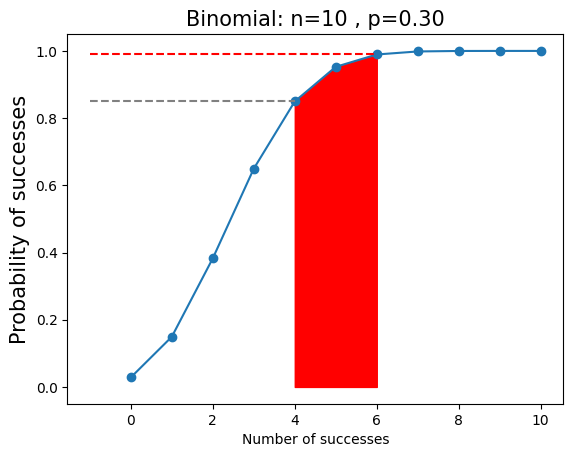

In [11]:
# plot cdf of binomial distribution for n = 10 and p = 0.3
# add horizontal lines for 4 and 6 successes in 10 trials, dashed lines

from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success

# calculate binomial distribution
number_occurences = np.arange(0, 11, 1) # number of successes - this is an array from 0 to 10
cdf_each_occurence = binom.cdf(number_occurences, n, p) # probability of successes - calculated for each number of successes

# plot binomial distribution
plt.plot(number_occurences, cdf_each_occurence, 'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)

# add horizontal lines for 4 and 6 successes in 10 trials, dashed lines that stop at the curve
plt.hlines(binom.cdf(4, n, p), -1, 4, colors='gray', linestyles='dashed')
plt.hlines(binom.cdf(6, n, p), -1, 6, colors='red', linestyles='dashed')
# fill the area between  4 and 6 successes in 10 trials
plt.fill_between(number_occurences, cdf_each_occurence, where=((number_occurences >= 4) & (number_occurences <= 6)), color='red')

plt.show()


#### Applicable to other distributions
Lets do the same for the Poisson distribution with $\lambda = 100$. Lets answer our question about the restaurant above.

In [43]:

from scipy.stats import poisson

# set variables
mu = 100 # mean

# calculate poisson distribution
number_occurences = np.arange(0, 200, 1) # number of successes - this is an array from 0 to 199
cdf_each_occurence = poisson.cdf(number_occurences, mu) # probability of successes - calculated for each number of successes

# plot poisson distribution
plt.plot(number_occurences, cdf_each_occurence, 'o-')
plt.title('Poisson: $\mu$=%.1f' % mu, fontsize=15)
plt.xlabel('Number of occurrences')
plt.ylabel('Probability N < x', fontsize=15)
plt.show()


In [42]:
## What is the probability that my restaurant receives more than 125 orders in a day?

from scipy.stats import poisson

# set variables 
mu = 100 # mean
prob = 1 - poisson.cdf(125, mu) # probability that my restaurant receives more than 125 orders in a day
print(f"Probability that my restaurant receives more than 125 orders in a day: {prob:.4f}")


# What is the probability that my restaurant receives between 70 and 130 orders in a day?
prob_differece = poisson.cdf(130, mu) - poisson.cdf(70, mu) # probability that my restaurant receives between 70 and 130 orders in a day
print(f"Probability that my restaurant receives between 70 and 130 orders in a day: {prob_differece:.4f}")

Probability that my restaurant receives more than 125 orders in a day: 0.0068
Probability that my restaurant receives between 70 and 130 orders in a day: 0.9973
